# **Feature Extraction Methods for Images**

The basic idea of feature extraction methods applied to images is to convert raw image data into a numerical representation, typically an array or a set of numerical descriptors. This numerical representation captures important characteristics or features of the image, making it amenable to analysis by machine learning algorithms and statistical techniques.

Feature extraction serves as a bridge between the raw visual content of an image and the mathematical models used in computer vision tasks. By extracting relevant features from images, we can abstract away unnecessary details while retaining essential information that is crucial for the task at hand.

There exist numerous feature extraction methods tailored to different types of image data and tasks. Among them, some standard techniques are commonly employed in image processing pipelines. These methods often include:

- **Pixel Intensity:** A straightforward approach involves using the pixel intensity values directly as features. In grayscale images, each pixel's intensity represents a feature, while in color images, features may include intensity values from different color channels (e.g., Red, Green, Blue).
Histogram-based Features: Histograms provide a compact representation of the distribution of pixel intensities in an image. Histogram-based features capture statistical information about the image's brightness, contrast, and color distribution. Common histogram features include mean, variance, skewness, and kurtosis.

- **Texture Features:** Texture refers to the spatial arrangement of pixels in an image and their variations in intensity or color. Texture features describe patterns, structures, and regularities present in different regions of the image. Techniques such as co-occurrence matrices, local binary patterns (LBP), and Gabor filters are commonly used for texture feature extraction.

- **Edge and Contour Features:** Edges represent abrupt changes in pixel intensity and often correspond to object boundaries or significant image structures. Edge detection algorithms extract features based on the presence, orientation, and strength of edges in the image. Contour-based features describe the shape, curvature, and spatial arrangement of object boundaries.

- **Transform-based Features:** Transform-based methods, such as Fourier transform, wavelet transform, and principal component analysis (PCA), extract features by analyzing the frequency, spatial, or spectral characteristics of the image. These methods help capture global and local image patterns efficiently.



## **Requirements**

Here we gather the required libraries, classes and function for this notebook.

In [1]:
import polars as pl
import numpy as np
from PIL import Image
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import tensorflow as tf
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import VGG16 
from keras.models import Model

`PyImageML` is a Python package that has been developed under this project, which has several utils for plotting images and extracting features from them, features that later could be used along with Machine Learning algorithms to solve typical ML tasks.


In [2]:
sys.path.insert(0, r"C:\Users\fscielzo\Documents\Packages\PyImageML_Package_Private")
from PyImageML.preprocessing import ImageFeaturesExtraction, ImageTensorFeaturesExtraction


## **Reading the data**

In [3]:
# Extracting the names of the images files as well as their class/category.
files_list_name = r'C:\Users\fscielzo\Documents\DataScience-GitHub\Image Analysis\Image-Classification\Fire-Detection\files_list.txt'
files_df = pl.read_csv(files_list_name, separator='\t', has_header=False, new_columns=['path', 'class'])
img_files_names = [files_df['path'][i].split('/')[1] for i in range(len(files_df))]

# building a list with the current paths of the data-set images.
img_path_list = []
folder_path = r'C:\Users\fscielzo\Documents\DataScience-GitHub\Image Analysis\Image-Classification\Fire-Detection\Data'
for filename in img_files_names:
    img_path_list.append(os.path.join(folder_path, filename))

## **Defining Response and Predictors**

In this section we define the response and predictors.

- **Predictors:** a list with the paths of the images files.
- **Response:** a vector (1D array) that identify the category of each image.


In [4]:
Y = files_df['class'].to_numpy()
X = img_path_list 

## **Pixel Method**

Given and image $\mathcal{I}$ of height $h$ and wight $w$, we have a different pixels representation of the image depending on whether it is color-scale or gray-scale.

In the Pixels method for extracting features on images the following points are crucial:



- $\mathcal{I}$ is defined by its pixels.



- $\mathcal{I}$ has $h\cdot w$ pixels.




- $\mathcal{I}$ can be represented as an 2D array (matrix) of pixels, where each element/position is a pixel.

    $$M(\mathcal{I}) = \begin{pmatrix} p_{1,1} & p_{1,2} &\dots & p_{1,w}  \\
                                   p_{2,1} & p_{2,2} & \dots & p_{2,w} \\
                                   \dots  & \dots & \dots \\
                                   p_{h,1} & p_{h,2} & \dots & p_{h,w}
                   \end{pmatrix} = \left( p_{ij}\right)_{\substack{i=1,..,h \\ j=1,..,w}}$$
    
    Where $p_{ij}$ is the pixel of $\mathcal{I}$ that occupies position $(i,j)$ in the image, namely, the pixel $(i,j)$.



- If $\mathcal{I}$ is **gray**-scale:

   $$p_{ij} \in [0,255] \subset \mathbb{Z}\\[0.5cm]$$

   - The closer $p_{ij}$ to $0$, the **lower** the **gray** intensity of the pixel.
   
   - The closer $p_{ij}$ to $255$, the **greater** the **gray** intensity of the pixel.



- If $\mathcal{I}$ is **color**-scale:

   $$p_{ij} = (R_{ij}, G_{ij}, B_{ij})$$

    - $R_{ij}, G_{ij}, B_{ij} \in [0,255] \subset \mathbb{Z}$ are the red, green and blue channels, respectively, that is, the red, green and blue part of the pixel $p_{ij}$.

   - The closer $R_{ij}, G_{ij}, B_{ij}$ to $0$, the **lower** the **red**, **green**, **blue** intensity of the pixel, respectively.
   - The closer $R_{ij}, G_{ij}, B_{ij}$ to $255$, the **greater** the **red**,**green**, **blue** intensity of the pixel, respectively.

### **Extracting pixel features from gray-scale image**

When $\mathcal{I}$ is gray-scale, there are no differences with the previous approach. 

`Python` gives us $M(\mathcal{I})$ directly as a 2D `numpy` array.


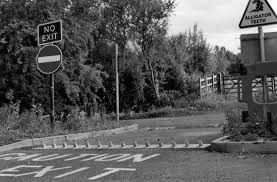

In [5]:
X = img_path_list 
example_img = Image.open(X[2])
example_img_gray = example_img.convert('L')
example_img_gray

- **Building the pixels matrix for a gray-scale image: $M(\mathcal{I})$**

   $M(\mathcal{I}) = $ `np.array(example_img_gray)`

In [6]:
img_gray_array = np.array(example_img_gray)
img_gray_array

array([[ 48,  87, 112, ..., 251, 252, 252],
       [ 33,  71,  53, ..., 252, 252, 252],
       [ 94, 105, 140, ..., 251, 252, 253],
       ...,
       [107, 102,  98, ..., 109, 108, 106],
       [102, 106, 109, ..., 119, 112, 109],
       [108, 107, 105, ..., 135, 122, 117]], dtype=uint8)

$p_{12} =$ `img_gray_array[0,1]`

In [7]:
img_gray_array[0,1]

87

$p_{40, 12} =$ `img_gray_array[39,11]`

In [8]:
img_gray_array[39,11]

62

**Plotting the array as an image**

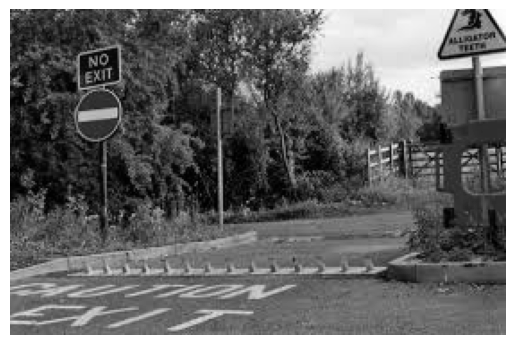

In [9]:
plt.imshow(img_gray_array, cmap='gray')
plt.axis('off')  # Hide the axis
plt.show()

### **Extracting pixel features from color image**

When $\mathcal{I}$ is color-scale, there are slightly differences with the previous approach. 

`Python` doesnt give us $M(\mathcal{I})$ directly, but we can access to their elements by mean of a 3D array. 

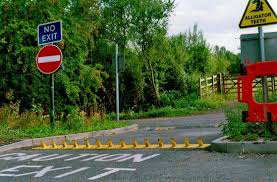

In [10]:
example_img

That 3D array is obtained with `np.array(example_img)`

In [11]:
img_color_array = np.array(example_img)
img_color_array

array([[[ 17,  73,   0],
        [ 58, 111,  39],
        [ 84, 136,  64],
        ...,
        [253, 250, 255],
        [254, 251, 255],
        [254, 250, 255]],

       [[  0,  57,   0],
        [ 40,  96,  25],
        [ 25,  76,   7],
        ...,
        [252, 251, 255],
        [252, 251, 255],
        [253, 251, 255]],

       [[ 60, 120,  48],
        [ 73, 130,  59],
        [112, 163,  94],
        ...,
        [251, 251, 251],
        [252, 251, 255],
        [253, 252, 255]],

       ...,

       [[ 93, 112, 116],
        [ 88, 107, 111],
        [ 84, 103, 107],
        ...,
        [101, 112, 116],
        [100, 111, 115],
        [ 98, 109, 113]],

       [[ 88, 107, 111],
        [ 92, 111, 115],
        [ 95, 114, 118],
        ...,
        [111, 122, 126],
        [104, 115, 119],
        [101, 112, 116]],

       [[ 94, 113, 117],
        [ 93, 112, 116],
        [ 91, 110, 114],
        ...,
        [127, 138, 142],
        [114, 125, 129],
        [109, 120, 124]]

The 3D `img_color_array` has a size of $(h, w, 3)$, where $h$ and $w$ are respectively the height and width of the image.

In [12]:
img_color_array.shape

(182, 277, 3)

`img_color_array` is made up by $h$ 2D arrays of size $w\times 3$.

The $i$-th 2D array of `img_color_array`, namely `img_color_array[i,:]`, contains in its rows the 1D array that represents pixel $(i,j)$, for $j=1,\dots,w$.

In other words, let $A(\mathcal{I})$ be the 3D array `img_color_array`, it contains $h$ 2D arrays $A(\mathcal{I})[i,:]$, that contains the pixels $(p_{ij} : j=1,\dots,w)$.

$$A(\mathcal{I})[i,:] = \begin{pmatrix} p_{i1}  \\
                                          p_{i2}  \\
                                          \dots \\
                                          p_{iw}
                         \end{pmatrix} = 
                         \begin{pmatrix} R_{i1} & G_{i1} & B_{i1}  \\
                                          R_{i2}& G_{i2}& B_{i2}   \\
                                          \dots &  \dots & \dots \\
                                          R_{iw}& G_{iw}& B_{iw}
                         \end{pmatrix} $$

Therefore:

$$A(\mathcal{I})[i,:][j,:] = p_{ij} = (R_{ij}, G_{ij}, B_{ij})$$


The flattened representation of $A(\mathcal{I})[i,:]$ is:

$$\mathcal{F}(A(\mathcal{I})[i,:]) =  (p_{i1},  \dots ,  p_{iw})  = (R_{i1} , G_{i1} , B_{i1},   \dots, R_{iw}, G_{iw}, B_{iw})$$

So, we can construct the $M(\mathcal{I})$ matrix as:

$$
M(\mathcal{I}) =  \Bigl(\mathcal{F}(A(\mathcal{I})[i,:])\Bigr)_{\substack{i=1,..,h}} =
=                   
\begin{pmatrix} p_{11} & \dots & p_{1w}  \\
                p_{21} & \dots& p_{2w}  \\
                \dots &\dots &  \dots\\
                 p_{h1} &  \dots& p_{hw}
\end{pmatrix} 
=                    
\begin{pmatrix} R_{11} & G_{11} & B_{11}&   \dots & R_{1w}& G_{1w}& B_{1w}  \\
                R_{21} & G_{21} & B_{21}&   \dots& R_{2w}& G_{2w}& B_{2w}   \\
                \dots &\dots &  \dots& \dots & \dots & \dots& \dots\\
                 R_{h1} & G_{h1} & B_{h1}&   \dots& R_{hw}& G_{hw}& B_{hw}
\end{pmatrix}
$$

For instance: $\hspace{0.1cm} p_{13}=$`example_img_color_array[0,:][2,:]` = `example_img_color_array[0,2]`

In [13]:
img_color_array[0,:][2,:]

array([ 84, 136,  64], dtype=uint8)

In [14]:
img_color_array[0,2]

array([ 84, 136,  64], dtype=uint8)

- **Building the pixels matrix for a color image: $M(\mathcal{I})$**

   We use the flatten procedure described above.

In [15]:
h = img_color_array.shape[0]
w = img_color_array.shape[1]
new_w = w*img_color_array.shape[2]
img_color_2D_array = np.zeros((h,new_w))
for i in range(0,h):
    img_color_2D_array[i,:] = img_color_array[i,:].flatten()

In [16]:
img_color_2D_array

array([[ 17.,  73.,   0., ..., 254., 250., 255.],
       [  0.,  57.,   0., ..., 253., 251., 255.],
       [ 60., 120.,  48., ..., 253., 252., 255.],
       ...,
       [ 93., 112., 116., ...,  98., 109., 113.],
       [ 88., 107., 111., ..., 101., 112., 116.],
       [ 94., 113., 117., ..., 109., 120., 124.]])

In [17]:
img_color_2D_array.shape

(182, 831)

We can plot the 2D array `img_color_2D_array` to realize how this representation of the original color image is not precise at all, since modify its size and remove the color pattern. 

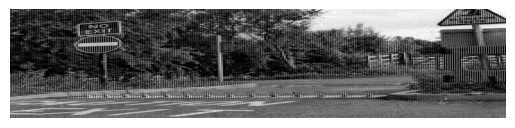

In [18]:
plt.imshow(img_color_2D_array, cmap='gray')
plt.axis('off')  # Hide the axis
plt.show()

If we want to plot the original color image we need the 3D array `img_color_array` that contains all its information, specifically regarding the color and the size.

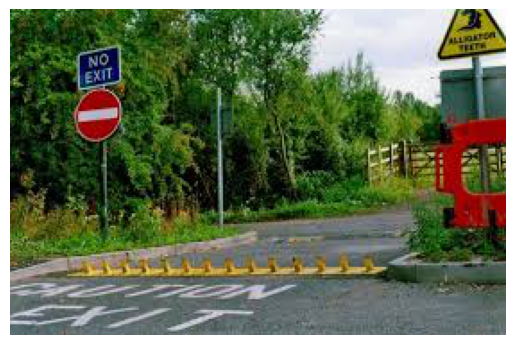

In [19]:
plt.imshow(img_color_array, cmap='gray')
plt.axis('off')  # Hide the axis
plt.show()

## **Pixel features array**

Once we know how to extract features of images the next step is to build a features array with those extracted features to be use along with Machine Learning models.

In this section this topic will be addressed following the different feature extraction method explained before. 

Most part of Machine Learning algorithms need a matrix (2D array) as input, usually called features/predictors matrix, but other are able to work with tensor, that is, 3D arrays, usually refer as sequential data. This last is specially common in the Deep Learning field.

Here we will cover both approaches, so that we are going to learn how to build both predictors matrices and tensors.

### **Sequential data: features tensor**

Given $n$ images $\mathcal{I}_1,\dots , \mathcal{I}_n$ of the same size $h\times w$.

Using the pixels method for features extraction, a features **tensor** for those images can be build as follows:  

$$X =   \begin{pmatrix} M(\mathcal{I}_1)  \\
                        M(\mathcal{I}_2)    \\
                        \dots  \\
                        M(\mathcal{I}_n) 
                        \end{pmatrix} $$

Where $M(\mathcal{I}_i)$ is the pixels matrix of the image $\mathcal{I}_i$.

This tensor is a 3D array of size $n\times h\times w$  that contains the pixels matrix of each image, so, is an array with $n$ matrices.

### **Tabular data: features matrix**

Given $n$ images $\mathcal{I}_1,\dots , \mathcal{I}_n$ of the same size $h\times w$.

Using the pixels method for features extraction, a **features matrix** for those images can be build as follows: 

$$X =   \begin{pmatrix} v(\mathcal{I}_1)  \\
                        v(\mathcal{I}_2)    \\
                        \dots  \\
                        v(\mathcal{I}_n) 
                        \end{pmatrix} $$

Where $v(\mathcal{I}_i)$ is the **vectorial pixels representation** (1D array) of the image $\mathcal{I}_i$ and $p$ is the length of $v(\mathcal{I}_i)$.

This matrix is a 2D array of size $n\times p$  that contains the flattened pixels matrix (`img_pixels_array.flatten()`)  of each image, let say, the pixels vector of each image.

#### **Vectorial representation of an image**

$v(\mathcal{I}_i)$ is the 1D array resulting of flatten $M(\mathcal{I}_i)$ $\Rightarrow$ `img_pixels_array.flatten()`



- If $\mathcal{I}_i$ is gray-scale:

   $$v(\mathcal{I}_i) = (p_{11}, \dots, p_{1w}, p_{21},\dots,p_{2w}, \dots,p_{h1},\dots,p_{hw})^{\prime}$$

   with a size of $h\cdot w$.


- If $\mathcal{I}_i$ is color:

   $$v(\mathcal{I}_i) = (R_{11}, G_{11}, B_{11},\dots,R_{1w},G_{1w},B_{1w},\dots,R_{h1},G_{h1},B_{h1},\dots,R_{hw},G_{hw},B_{hw})^{\prime}$$

   and its size is $3\cdot h \cdot w$.

We can obtain the vectorial representation of both the gray and color-scale images using using the function `flatten()` on `img_gray_array` and `img_color_array`, respectively.

In [20]:
img_gray_pixels_vector = img_gray_array.flatten()
img_gray_pixels_vector

array([ 48,  87, 112, ..., 135, 122, 117], dtype=uint8)

In [21]:
img_color_pixels_vector = img_color_array.flatten()
img_color_pixels_vector

array([ 17,  73,   0, ..., 109, 120, 124], dtype=uint8)

>Extracting the vector `img_pixels_vector` for each image on the data-set and concatenating them by rows we obtain a **pixels features matrix**.

Once we have  $$X =   \begin{pmatrix} v(\mathcal{I}_1)  \\
                        v(\mathcal{I}_2)    \\
                        \dots  \\
                        v(\mathcal{I}_n) 
                        \end{pmatrix} $$
            
we have a quantitative predictors matrix with images as rows (observations/individuals) and pixels (gray-scale) or channel-pixels (color-scale) as columns (features/predictors).

This matrix is $n\times p$ size, with $p=h\cdot w$ if images are gray-scale, and $p=3\cdot h \cdot w$ if images are color-scale.



- The **problem** of this approach is the **high dimensionality** on $p$. 

    To solve this **dimensionality reduction** techniques such as PCA could be used.

**Plotting vector as image**

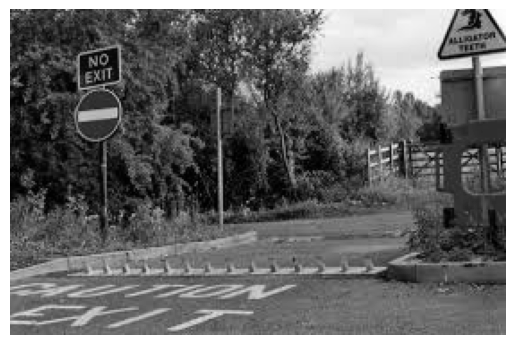

In [22]:
plt.imshow(img_gray_pixels_vector.reshape(img_gray_array.shape), cmap='gray')
plt.axis('off')  # Hide the axis
plt.show()

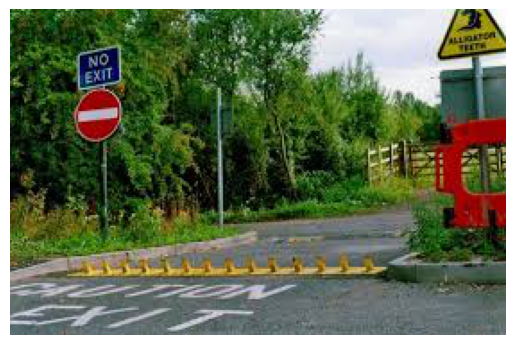

In [23]:
plt.imshow(img_color_pixels_vector.reshape(img_color_array.shape), cmap='gray')
plt.axis('off')  # Hide the axis
plt.show()

### **Getting pixels features matrix for gray-scale images**

In this section we are going to use the  class `ImageFeaturesExtraction` from the `PyImageML` package , which has been developed to extract features array from data-sets of images, allowing different method for features extraction as well as different functionalities like working with both color and gray images, many filters, different formats and strategies for the different features extraction methods and so on.

In this section `ImageFeaturesExtraction` will be applied with the **pixels** method for feature extraction on **gray-scale** images, using the data-set of images presented above.

- **Array format**

In [24]:
# Defining the desired size of the images
img_height = 240
img_width = 184

In [25]:
img_feature_extraction = ImageFeaturesExtraction(method='pixels', image_height=img_height, image_width=img_width, 
                                                 convert_to_gray=True, filter=None, format='array')

gray_pixels_features_matrix = img_feature_extraction.fit_transform(X=X)

In [26]:
gray_pixels_features_matrix

array([[ 26,  19,  28, ..., 115, 110, 109],
       [ 44,  96, 109, ..., 151, 149, 149],
       [ 62, 102,  75, ..., 109, 131, 118],
       ...,
       [ 11,  10,  10, ...,   1,   2,   2],
       [  5,   6,   6, ...,   6,   4,  27],
       [148, 150, 152, ...,  33,  43,  48]], dtype=uint8)

In [27]:
gray_pixels_features_matrix.shape

(300, 44160)

- **Data-frame format**

In [28]:
img_feature_extraction = ImageFeaturesExtraction(method='pixels', image_height=img_height, image_width=img_width, 
                                                 convert_to_gray=True, filter=None, format='data-frame')

gray_pixels_features_matrix = img_feature_extraction.fit_transform(X=X)

In [29]:
gray_pixels_features_matrix

shape: (300, 44_160)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ pixel_1_1 ┆ pixel_1_2 ┆ pixel_1_3 ┆ pixel_1_4 ┆ … ┆ pixel_184 ┆ pixel_184 ┆ pixel_184 ┆ pixel_18 │
│ ---       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ _237      ┆ _238      ┆ _239      ┆ 4_240    │
│ u8        ┆ u8        ┆ u8        ┆ u8        ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---      │
│           ┆           ┆           ┆           ┆   ┆ u8        ┆ u8        ┆ u8        ┆ u8       │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ 26        ┆ 19        ┆ 28        ┆ 50        ┆ … ┆ 121       ┆ 115       ┆ 110       ┆ 109      │
│ 44        ┆ 96        ┆ 109       ┆ 49        ┆ … ┆ 151       ┆ 151       ┆ 149       ┆ 149      │
│ 62        ┆ 102       ┆ 75        ┆ 82        ┆ … ┆ 108       ┆ 109       ┆ 131       ┆ 118      │
│ 133       ┆ 105       ┆ 51        ┆ 110       ┆ … ┆ 98        ┆ 99        ┆ 92        ┆ 92       │
│ 235       ┆ 246       ┆ 250       ┆ 247       ┆ … ┆ 107       ┆ 142       ┆ 150       ┆ 145      │
│ …         ┆ …         ┆ …         ┆ …         ┆ … ┆ …         ┆ …         ┆ …         ┆ …        │
│ 93        ┆ 86        ┆ 95        ┆ 87        ┆ … ┆ 109       ┆ 109       ┆ 110       ┆ 111      │
│ 4         ┆ 6         ┆ 7         ┆ 9         ┆ … ┆ 99        ┆ 94        ┆ 79        ┆ 77       │
│ 11        ┆ 10        ┆ 10        ┆ 10        ┆ … ┆ 1         ┆ 1         ┆ 2         ┆ 2        │
│ 5         ┆ 6         ┆ 6         ┆ 7         ┆ … ┆ 1         ┆ 6         ┆ 4         ┆ 27       │
│ 148       ┆ 150       ┆ 152       ┆ 156       ┆ … ┆ 48        ┆ 33        ┆ 43        ┆ 48       │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴──────────┘

- **Applying equalization**

In [30]:
img_feature_extraction = ImageFeaturesExtraction(method='pixels', image_height=img_height, image_width=img_width, 
                                                 convert_to_gray=True, filter='equalized', format='array')

gray_pixels_features_filtered_matrix = img_feature_extraction.fit_transform(X=X)

In [31]:
gray_pixels_features_filtered_matrix

array([[6.91349638e-02, 4.56748188e-02, 7.71739130e-02, ...,
        5.79211957e-01, 5.48550725e-01, 5.41802536e-01],
       [6.11186594e-02, 3.41553442e-01, 4.19723732e-01, ...,
        6.42255435e-01, 6.28736413e-01, 6.28736413e-01],
       [3.23596014e-01, 6.44021739e-01, 4.18025362e-01, ...,
        7.19791667e-01, 8.49682971e-01, 8.01041667e-01],
       ...,
       [5.70312500e-01, 5.47961957e-01, 5.47961957e-01, ...,
        9.89130435e-02, 2.85665761e-01, 2.85665761e-01],
       [2.26449275e-04, 4.30253623e-04, 4.30253623e-04, ...,
        4.30253623e-04, 9.05797101e-05, 8.42617754e-02],
       [8.93432971e-01, 8.99230072e-01, 9.05049819e-01, ...,
        6.14356884e-02, 1.38337862e-01, 1.81227355e-01]])

In [32]:
gray_pixels_features_filtered_matrix.shape

(300, 44160)

- **Applying sobel filter**

In [33]:
img_feature_extraction = ImageFeaturesExtraction(method='pixels', image_height=img_height, image_width=img_width, 
                                                 convert_to_gray=True, filter='sobel', format='array')

gray_pixels_features_filtered_matrix = img_feature_extraction.fit_transform(X=X)

In [34]:
gray_pixels_features_filtered_matrix

array([[ 2.6925824 , 13.        , 20.98809186, ...,  7.77817459,
         4.24264069,  0.70710678],
       [37.83186488, 50.25497488, 32.669749  , ...,  1.60078106,
         1.41421356,  0.        ],
       [27.90721233, 18.51013236, 17.83605898, ..., 15.39683409,
         7.8142498 ,  9.48683298],
       ...,
       [ 0.70710678,  0.70710678,  0.        , ...,  0.70710678,
         0.70710678,  0.        ],
       [ 0.75      ,  0.55901699,  0.70710678, ..., 27.0935878 ,
        28.7108429 , 15.97654531],
       [11.01135777, 12.35161933, 14.63087489, ...,  2.15058132,
        10.85414667,  4.27200187]])

In [35]:
gray_pixels_features_filtered_matrix.shape

(300, 44160)

### **Getting pixels features matrix for color images**

In this section we are going to use the  class `ImageFeaturesExtraction` from the `PyImageML` package , which has been developed to extract features matrices from data-sets of images, allowing different method for features extraction as well as different functionalities like working with both color and gray images, many filters, different formats and strategies for the different features extraction methods and so on.

In this section `ImageFeaturesExtraction` will be applied with the **pixels** method for feature extraction on **color** images, using the data-set of images presented above.

- **Array format**

In [36]:
img_feature_extraction = ImageFeaturesExtraction(method='pixels', image_height=img_height, image_width=img_width, 
                                                 convert_to_gray=False, filter=None, format='array')

color_pixels_features_matrix = img_feature_extraction.fit_transform(X=X)

In [37]:
color_pixels_features_matrix

array([[ 23,  28,  21, ..., 120, 111,  72],
       [ 43,  48,  26, ..., 136, 152, 168],
       [ 31,  87,  13, ..., 110, 121, 125],
       ...,
       [ 26,   5,   2, ...,   3,   1,   2],
       [ 18,   0,   0, ...,  41,  22,  14],
       [105, 155, 224, ...,  63,  44,  29]], dtype=uint8)

In [38]:
color_pixels_features_matrix.shape

(300, 132480)

- **Data-frame format**

In [39]:
img_feature_extraction = ImageFeaturesExtraction(method='pixels', image_height=img_height, image_width=img_width, 
                                                 convert_to_gray=False, filter=None, format='data-frame')

color_pixels_features_matrix = img_feature_extraction.fit_transform(X=X)

In [40]:
color_pixels_features_matrix

shape: (300, 132_480)
┌───────┬───────┬───────┬───────┬───┬───────────┬───────────┬───────────┬───────────┐
│ R_1_1 ┆ G_1_1 ┆ B_1_1 ┆ R_1_2 ┆ … ┆ B_184_239 ┆ R_184_240 ┆ G_184_240 ┆ B_184_240 │
│ ---   ┆ ---   ┆ ---   ┆ ---   ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---       │
│ u8    ┆ u8    ┆ u8    ┆ u8    ┆   ┆ u8        ┆ u8        ┆ u8        ┆ u8        │
╞═══════╪═══════╪═══════╪═══════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 23    ┆ 28    ┆ 21    ┆ 15    ┆ … ┆ 73        ┆ 120       ┆ 111       ┆ 72        │
│ 43    ┆ 48    ┆ 26    ┆ 94    ┆ … ┆ 168       ┆ 136       ┆ 152       ┆ 168       │
│ 31    ┆ 87    ┆ 13    ┆ 74    ┆ … ┆ 138       ┆ 110       ┆ 121       ┆ 125       │
│ 153   ┆ 127   ┆ 110   ┆ 121   ┆ … ┆ 80        ┆ 95        ┆ 93        ┆ 80        │
│ 235   ┆ 235   ┆ 237   ┆ 246   ┆ … ┆ 134       ┆ 153       ┆ 144       ┆ 129       │
│ …     ┆ …     ┆ …     ┆ …     ┆ … ┆ …         ┆ …         ┆ …         ┆ …         │
│ 99    ┆ 97    ┆ 59    ┆ 92    ┆ … ┆ 115       ┆ 108       ┆ 111       ┆ 116       │
│ 4     ┆ 5     ┆ 0     ┆ 6     ┆ … ┆ 20        ┆ 92        ┆ 81        ┆ 17        │
│ 26    ┆ 5     ┆ 2     ┆ 25    ┆ … ┆ 2         ┆ 3         ┆ 1         ┆ 2         │
│ 18    ┆ 0     ┆ 0     ┆ 19    ┆ … ┆ 0         ┆ 41        ┆ 22        ┆ 14        │
│ 105   ┆ 155   ┆ 224   ┆ 107   ┆ … ┆ 24        ┆ 63        ┆ 44        ┆ 29        │
└───────┴───────┴───────┴───────┴───┴───────────┴───────────┴───────────┴───────────┘

- **Applying equalization**

In [41]:
img_feature_extraction = ImageFeaturesExtraction(method='pixels', image_height=img_height, image_width=img_width, 
                                                 convert_to_gray=False, filter='equalized', format='array')

color_pixels_features_filtered_matrix = img_feature_extraction.fit_transform(X=X)

In [42]:
color_pixels_features_filtered_matrix

array([[4.65089942e-02, 5.66196451e-02, 4.24647339e-02, ...,
        5.48270993e-01, 5.07150669e-01, 3.28962596e-01],
       [4.72852531e-02, 5.27835383e-02, 2.85910833e-02, ...,
        6.21546825e-01, 6.94669981e-01, 7.67793137e-01],
       [1.28630418e-01, 3.60995045e-01, 5.39417883e-02, ...,
        6.55259591e-01, 7.20785550e-01, 7.44613171e-01],
       ...,
       [5.26830199e-01, 1.01313500e-01, 4.05253999e-02, ...,
        6.63003517e-02, 2.21001172e-02, 4.42002344e-02],
       [2.52291134e-04, 0.00000000e+00, 0.00000000e+00, ...,
        2.30458316e-02, 1.23660560e-02, 7.86930834e-03],
       [3.94867372e-01, 5.82899453e-01, 8.42383726e-01, ...,
        2.05513093e-01, 1.43532954e-01, 9.46012648e-02]])

In [43]:
color_pixels_features_filtered_matrix.shape

(300, 132480)

- **Applying canny filter**

In [45]:
img_feature_extraction = ImageFeaturesExtraction(method='pixels', image_height=img_height, image_width=img_width, 
                                                 convert_to_gray=False, filter='canny', format='array')

color_pixels_features_filtered_matrix = img_feature_extraction.fit_transform(X=X)

In [46]:
color_pixels_features_filtered_matrix

array([[0.00900378, 0.01096112, 0.00822084, ..., 0.00277297, 0.002565  ,
        0.00166378],
       [0.13352273, 0.14904863, 0.08073467, ..., 0.00224478, 0.00250888,
        0.00277297],
       [0.03868009, 0.10855381, 0.01622068, ..., 0.03273887, 0.03601276,
        0.03720327],
       ...,
       [0.00277297, 0.00053326, 0.00021331, ..., 0.        , 0.        ,
        0.        ],
       [0.00277297, 0.        , 0.        , ..., 0.06980089, 0.03745414,
        0.02383445],
       [0.02024147, 0.02988026, 0.0431818 , ..., 0.01675295, 0.01170047,
        0.00771167]])

In [47]:
color_pixels_features_filtered_matrix.shape

(300, 132480)

### **Getting pixels features tensor for gray-scale images**

In this section we are going to present the  class `ImageTensorFeaturesExtraction` from the `PyImageML` package , which has been developed to extract features tensors from data-sets of images, is based in the pixels method for features extraction, and allows both color and gray images, and different formats to deal with the color images.

In this section `ImageTensorFeaturesExtraction` will be applied on gray-scale images, using the data-set of images presented above.

In [48]:
img_feature_extraction = ImageTensorFeaturesExtraction(image_height=img_height, image_width=img_width, convert_to_gray=True)
gray_pixels_features_tensor = img_feature_extraction.fit_transform(X=X)

In [49]:
gray_pixels_features_tensor

array([[[ 26,  19,  28, ...,  75,  63,  59],
        [ 21,  48,  43, ...,  81,  53,  46],
        [ 21,  49,  47, ...,  92,  59,  44],
        ...,
        [145, 206, 205, ..., 119, 110, 109],
        [130, 185, 173, ..., 115, 110, 109],
        [136, 163, 170, ..., 115, 110, 109]],

       [[ 44,  96, 109, ..., 225, 233, 229],
        [ 42, 100, 130, ..., 220, 235, 246],
        [ 61,  77, 139, ..., 218, 241, 239],
        ...,
        [ 73,  70,  80, ..., 151, 153, 153],
        [ 71,  69,  77, ..., 151, 149, 149],
        [ 71,  69,  78, ..., 151, 149, 149]],

       [[ 62, 102,  75, ..., 251, 251, 252],
        [ 49,  70,  60, ..., 251, 252, 252],
        [ 65,  83,  85, ..., 251, 252, 252],
        ...,
        [104, 105, 102, ..., 103, 113, 108],
        [105, 108, 103, ..., 105, 122, 113],
        [108, 106, 102, ..., 109, 131, 118]],

       ...,

       [[ 11,  10,  10, ...,   4,   4,   4],
        [ 11,  10,  10, ...,   4,   4,   4],
        [ 11,  10,  10, ...,   4,   4,   4

In [50]:
gray_pixels_features_tensor.shape

(300, 240, 184)

### **Getting pixels features tensor for color images**

In this section we are going to use the  class `ImageTensorFeaturesExtraction` from the `PyImageML` package , which has been developed to extract features tensors from data-sets of images, is based in the pixels method for features extraction, and allows both color and gray images, and different formats to deal with the color images.

In this section `ImageTensorFeaturesExtraction` will be applied on color images, using the data-set of images presented above.

- **Tensor of 2D arrays**

In [51]:
img_feature_extraction = ImageTensorFeaturesExtraction(image_height=img_height, image_width=img_width, convert_to_gray=False, color_dim='2D')
color_pixels_features_tensor = img_feature_extraction.fit_transform(X=X)

In [52]:
color_pixels_features_tensor

array([[[ 23.,  28.,  21., ...,  52.,  64.,  54.],
        [ 18.,  23.,  17., ...,  39.,  51.,  38.],
        [ 18.,  23.,  17., ...,  38.,  49.,  34.],
        ...,
        [142., 143., 162., ..., 120., 111.,  71.],
        [125., 130., 142., ..., 120., 111.,  72.],
        [132., 136., 148., ..., 120., 111.,  72.]],

       [[ 43.,  48.,  26., ..., 226., 229., 236.],
        [ 41.,  46.,  24., ..., 243., 246., 251.],
        [ 60.,  65.,  43., ..., 236., 239., 244.],
        ...,
        [ 69.,  74.,  78., ..., 147., 154., 162.],
        [ 68.,  71.,  76., ..., 135., 152., 169.],
        [ 68.,  71.,  76., ..., 136., 152., 168.]],

       [[ 31.,  87.,  13., ..., 254., 250., 255.],
        [ 16.,  73.,   8., ..., 253., 251., 255.],
        [ 32.,  90.,  25., ..., 253., 251., 255.],
        ...,
        [ 90., 109., 113., ..., 100., 111., 115.],
        [ 91., 110., 114., ..., 105., 116., 120.],
        [ 94., 113., 117., ..., 110., 121., 125.]],

       ...,

       [[ 26.,   5.,   2

In [53]:
color_pixels_features_tensor.shape

(300, 240, 552)

- **Tensor of 3D arrays**

In [54]:
img_feature_extraction = ImageTensorFeaturesExtraction(image_height=img_height, image_width=img_width, convert_to_gray=False, color_dim='3D')
color_pixels_features_tensor = img_feature_extraction.fit_transform(X=X)

In [55]:
color_pixels_features_tensor

array([[[[ 23,  28,  21],
         [ 15,  22,  12],
         [ 25,  31,  19],
         ...,
         [ 68,  81,  60],
         [ 55,  67,  59],
         [ 52,  64,  54]],

        [[ 18,  23,  17],
         [ 45,  50,  43],
         [ 40,  46,  36],
         ...,
         [ 74,  87,  66],
         [ 46,  58,  45],
         [ 39,  51,  38]],

        [[ 18,  23,  17],
         [ 47,  51,  44],
         [ 44,  50,  40],
         ...,
         [ 85,  98,  78],
         [ 53,  64,  49],
         [ 38,  49,  34]],

        ...,

        [[142, 143, 162],
         [204, 205, 220],
         [203, 205, 214],
         ...,
         [129, 121,  82],
         [121, 112,  72],
         [120, 111,  71]],

        [[125, 130, 142],
         [181, 185, 197],
         [167, 174, 183],
         ...,
         [125, 117,  76],
         [121, 112,  73],
         [120, 111,  72]],

        [[132, 136, 148],
         [160, 163, 175],
         [165, 171, 180],
         ...,
         [125, 117,  76],
        

In [56]:
color_pixels_features_tensor.shape

(300, 240, 184, 3)

## **Histogram of Oriented Gradients Method**

HOG (Histogram of Oriented Gradients) is a technique used for feature extraction in image processing and computer vision tasks like object detection and classification. It works by dividing an image into small regions, computes the gradient orientation within each region, and then builds a histogram of these gradients. The resulting feature vector represents the distribution of gradient orientations, capturing important information about the edges and textures present in the image. HOG is particularly effective for recognizing objects in images regardless of changes in lighting conditions and backgrounds, making it a popular choice in various applications such as pedestrian detection, face recognition, and surveillance.

A brief summary of how Histogram of Oriented Gradients (HOG) works as a feature extraction method for images:

- **Gradient Calculation:** Compute the gradient (derivative) of pixel intensities in the image to capture local edge information. Typically, gradient magnitude and direction are computed using gradient filters like the Sobel operator.

- **Cell Division:** Divide the image into small, overlapping cells (e.g., 8x8 pixels). Each cell accumulates gradient information by constructing histograms of gradient orientations.

- **Histograms of Oriented Gradients:** Within each cell, construct histograms of gradient orientations to represent the distribution of edge directions. This captures local texture and shape information.

- **Block Normalization:** Group cells into larger blocks (e.g., 2x2 or 3x3 cells) to enhance local contrast and normalize illumination changes. Normalize the histograms within each block to make the descriptor invariant to changes in lighting and contrast.

- **Descriptor Formation:** Concatenate the normalized block features to form the final HOG descriptor for the image. This descriptor captures the local intensity gradients and their orientations across different regions of the image.

- **Feature Vector Extraction:** The HOG descriptor forms a feature vector representing the image. This feature vector can be used as input to machine learning algorithms for tasks such as object detection, classification, or similarity comparison.

The method `hog` from the module `feature` of the `skimage` package provides a way to compute a Histogram of Oriented Gradients (HOG) by:

- Global image normalisation (optional)

- Computing the gradient image in x and y

- Computing gradient histograms

- Normalising across blocks

- Flattening into a feature vector 

HOG usually works on gray-scale images, so images should be converted to gray-scale before serving as input for this method.

Once we have the HOG feature vector for a given image we can proceed in several ways, specifically the following will be considered throughout this project:

- Consider the HOG features vector as the numerical representation of the image. 

   - This approach usually leads to a computational problem since the length of this vectors is usually massive, but this issue can be mitigated utilizing dimensionality reduction techniques, such as PCA.

- Transform the HOG features vector into a features matrix.

   - Transform the features matrix in a new features vector by computing **statistics** along the matrix columns.
   - Transform the features matrix in a new features vector by computing the **histogram of bags of visual words** (BVW).

In order to understand better how HOG works we are going to apply it to several images, and plot the resulting HOG image along with the original one, to compare and extract valuable insight regarding this method just in a visual manner. 

Here a classic example, provided in the `skimage` documentation.

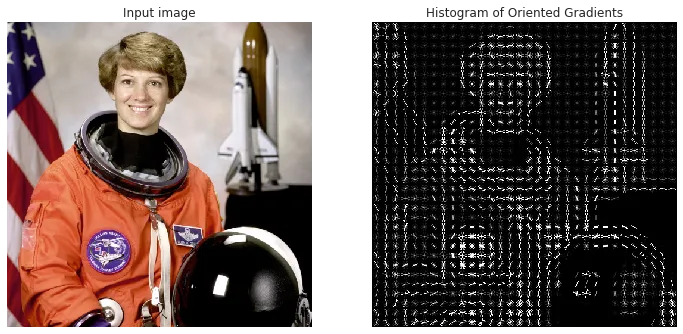

In [59]:
Image.open(r'C:\Users\fscielzo\Documents\DataScience-GitHub\Image Analysis\Image-Classification\Fire-Detection\images\HOG_1.webp')

The next plot includes several images of our data-set together with its HOG representation.

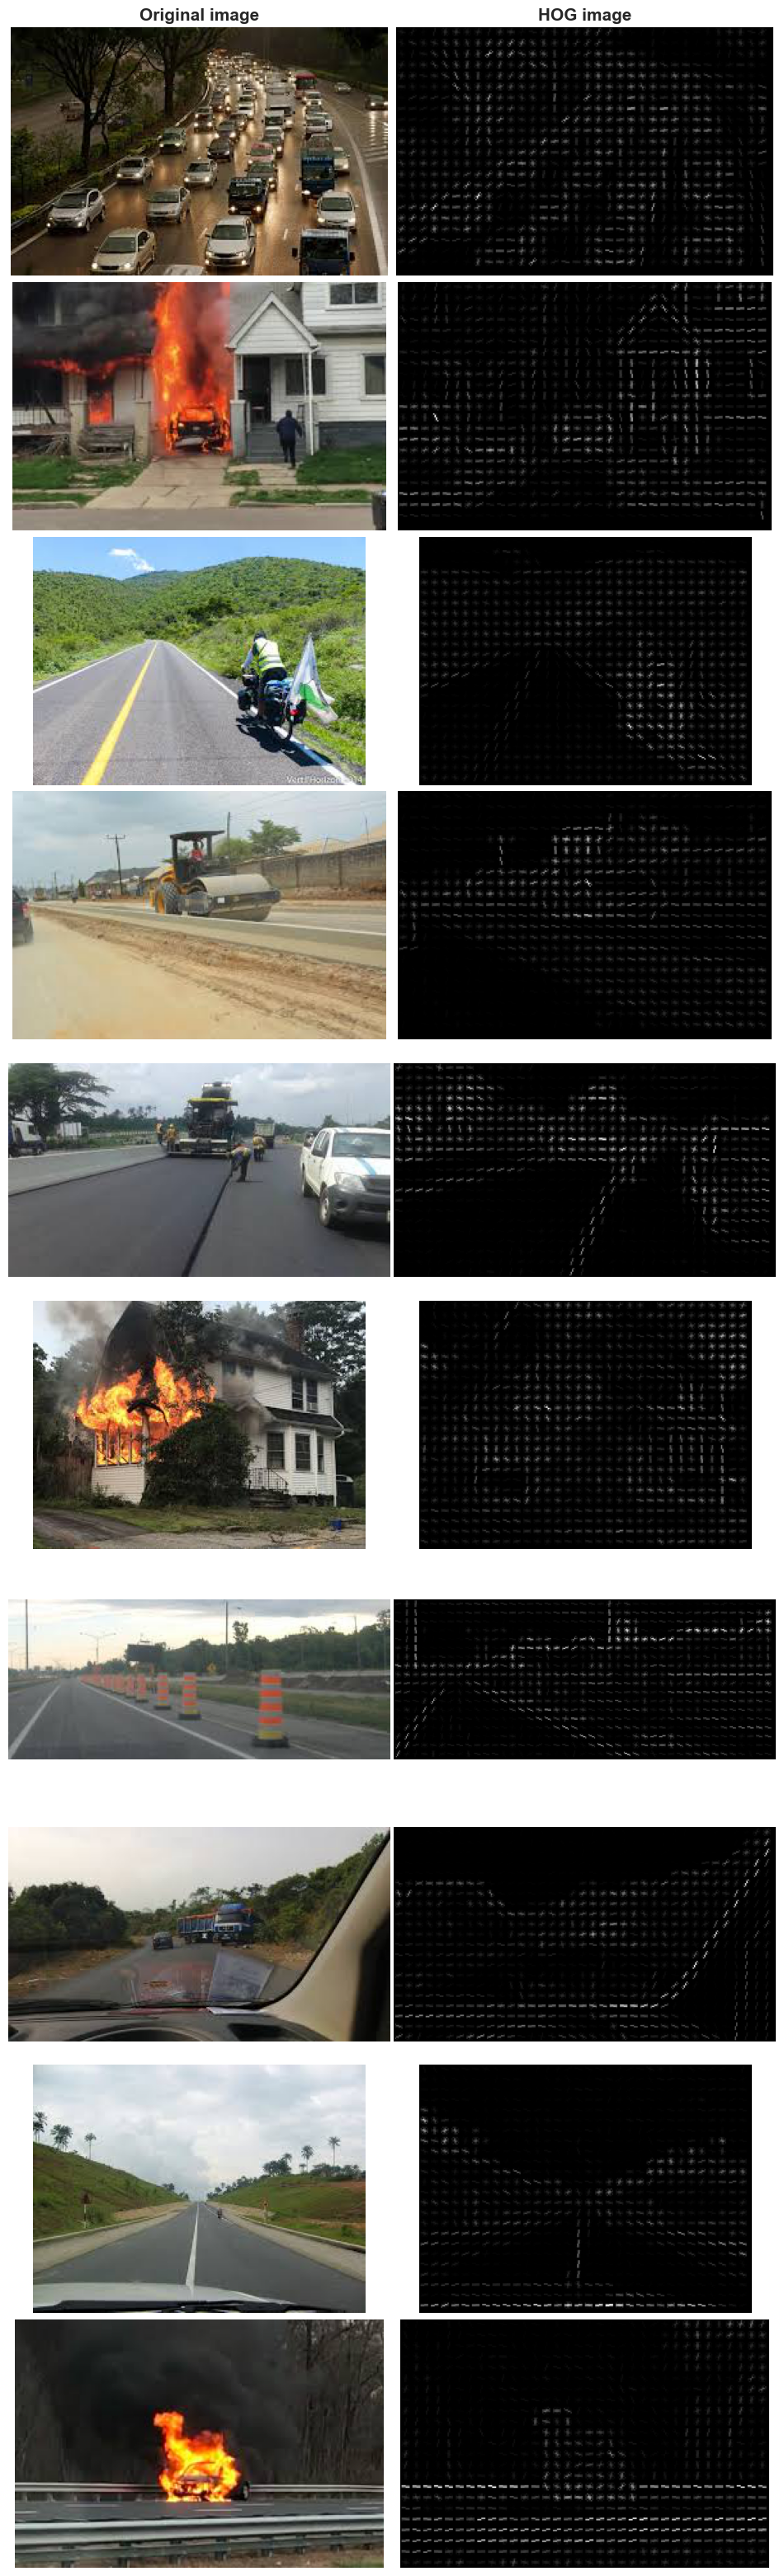

In [60]:
CELLS_PER_BLOCK_HOR = 2
CELLS_PER_BLOCK_VER = 2
PIXELS_PER_CELL_HOR = 8
PIXELS_PER_CELL_VER = 8
orientations = 8
pixels_per_cell=(PIXELS_PER_CELL_HOR, PIXELS_PER_CELL_VER)
cells_per_block=(CELLS_PER_BLOCK_HOR, CELLS_PER_BLOCK_VER)

n_images = 9
np.random.seed(0)
random_idx = np.random.choice(len(X), n_images, replace=False).tolist()
random_idx = random_idx + [103]
img_gray_array_list = [np.array(Image.open(X[i]).convert('L')) for i in random_idx]
img_color_array_list = [np.array(Image.open(X[i])) for i in random_idx]

HOG_visualize_list = []
for img_array in img_gray_array_list:
    
    HOG_img, HOG_visualize = feature.hog(img_array, orientations=orientations,
                pixels_per_cell=pixels_per_cell,
                cells_per_block=cells_per_block,
                transform_sqrt=True, visualize=True)
    
    HOG_visualize_list.append(HOG_visualize)
    
n_rows = len(list(zip(img_color_array_list, HOG_visualize_list)))
subplot_idx = [(i, i + 1) for i in range(0, n_rows*2, 2)]

fig, axes = plt.subplots(n_rows, 2, figsize=(12,40))
axes = axes.flatten() 

for (i, j), img_color_array, HOG_visualize in zip(subplot_idx, img_color_array_list, HOG_visualize_list):
    
    axes[i].imshow(img_color_array, cmap='gray')
    axes[j].imshow(HOG_visualize, cmap='gray')
    
    if i == 0:
        axes[i].set_title('Original image', size=15, weight='bold')
        axes[j].set_title('HOG image', size=15, weight='bold')

for i in range(len(axes)):
    axes[i].axis('off')  # Hide the axis

plt.subplots_adjust(hspace=0.025, wspace=0.01) 
plt.show()

Now we are going to explore how are the outputs resulting of applying HOG on an image.

- **HOG features vector**

In [61]:
img_gray_array = np.array(Image.open(X[103]).convert('L'))

HOG_img, HOG_visualize = feature.hog(img_gray_array, orientations=orientations,
                pixels_per_cell=pixels_per_cell,
                cells_per_block=cells_per_block,
                transform_sqrt=True, visualize=True)

In [62]:
HOG_img

array([0.36364343, 0.03360488, 0.02089678, ..., 0.03660126, 0.02114829,
       0.01176881])

In [63]:
HOG_img.shape

(23232,)

- **HOG feature matrix:** reshaping the features vector into a matrix.

In [64]:
p = orientations * cells_per_block[0] * cells_per_block[1] # number of features
n = int(np.shape(HOG_img)[0]/p) # length of the features
HOG_img = np.reshape(HOG_img, (n, p))

In [65]:
HOG_img

array([[0.36364343, 0.03360488, 0.02089678, ..., 0.03471119, 0.04365133,
        0.        ],
       [0.47612765, 0.        , 0.        , ..., 0.0672579 , 0.12666173,
        0.        ],
       [0.38112443, 0.        , 0.07521982, ..., 0.        , 0.048066  ,
        0.        ],
       ...,
       [0.15979678, 0.0981024 , 0.16545619, ..., 0.14736083, 0.08917909,
        0.03633761],
       [0.04752936, 0.15648015, 0.12212673, ..., 0.11533974, 0.05735903,
        0.00558269],
       [0.25748894, 0.28158486, 0.11105426, ..., 0.03660126, 0.02114829,
        0.01176881]])

In [66]:
HOG_img.shape

(726, 32)

### **Based on Statistics**



Statistics aggregation can be used to transform the `HOG_img` matrix into a features vector that represent the given image. In other words, to extracts a features vector for a given images based on HOG.

In the next cells a couple of examples of how to do it are shown.

- **Statistics:** **mean**

In [67]:
HOG_img_mean = np.mean(HOG_img, axis=0)
HOG_img_mean

array([0.14679672, 0.0803544 , 0.09536614, 0.1419433 , 0.21723404,
       0.08575819, 0.10150205, 0.08248819, 0.14743567, 0.08275199,
       0.09822818, 0.1462247 , 0.21792027, 0.08908326, 0.10341332,
       0.08480108, 0.15140446, 0.08353412, 0.09937754, 0.16057091,
       0.23059348, 0.09163763, 0.1043415 , 0.08710898, 0.15154042,
       0.08582017, 0.100348  , 0.16331974, 0.23107536, 0.09231949,
       0.10460763, 0.08779868])

In [68]:
HOG_img_mean.shape

(32,)

- **Statistics:** **mean-std**

In [69]:
HOG_img_mean = np.mean(HOG_img, axis=0)
HOG_img_std = np.std(HOG_img, axis=0)
HOG_img_stats = np.hstack([HOG_img_mean, HOG_img_std])
HOG_img_stats

array([0.14679672, 0.0803544 , 0.09536614, 0.1419433 , 0.21723404,
       0.08575819, 0.10150205, 0.08248819, 0.14743567, 0.08275199,
       0.09822818, 0.1462247 , 0.21792027, 0.08908326, 0.10341332,
       0.08480108, 0.15140446, 0.08353412, 0.09937754, 0.16057091,
       0.23059348, 0.09163763, 0.1043415 , 0.08710898, 0.15154042,
       0.08582017, 0.100348  , 0.16331974, 0.23107536, 0.09231949,
       0.10460763, 0.08779868, 0.1317824 , 0.09294007, 0.09738209,
       0.15405147, 0.13246163, 0.09432467, 0.110728  , 0.10418498,
       0.13221261, 0.09430074, 0.09785966, 0.15478669, 0.13196037,
       0.09770127, 0.11163924, 0.10598677, 0.134641  , 0.09318608,
       0.09613184, 0.1606208 , 0.13438775, 0.09621373, 0.11163673,
       0.10831574, 0.13312731, 0.09576936, 0.0957986 , 0.15947756,
       0.13395827, 0.09442077, 0.11003086, 0.10837857])

In [70]:
HOG_img_stats.shape

(64,)



#### **Based on Bags of Visual Words (BVW)**

The following diagram explains how the BVW can be used to extract a features vector from an image based on HOG.

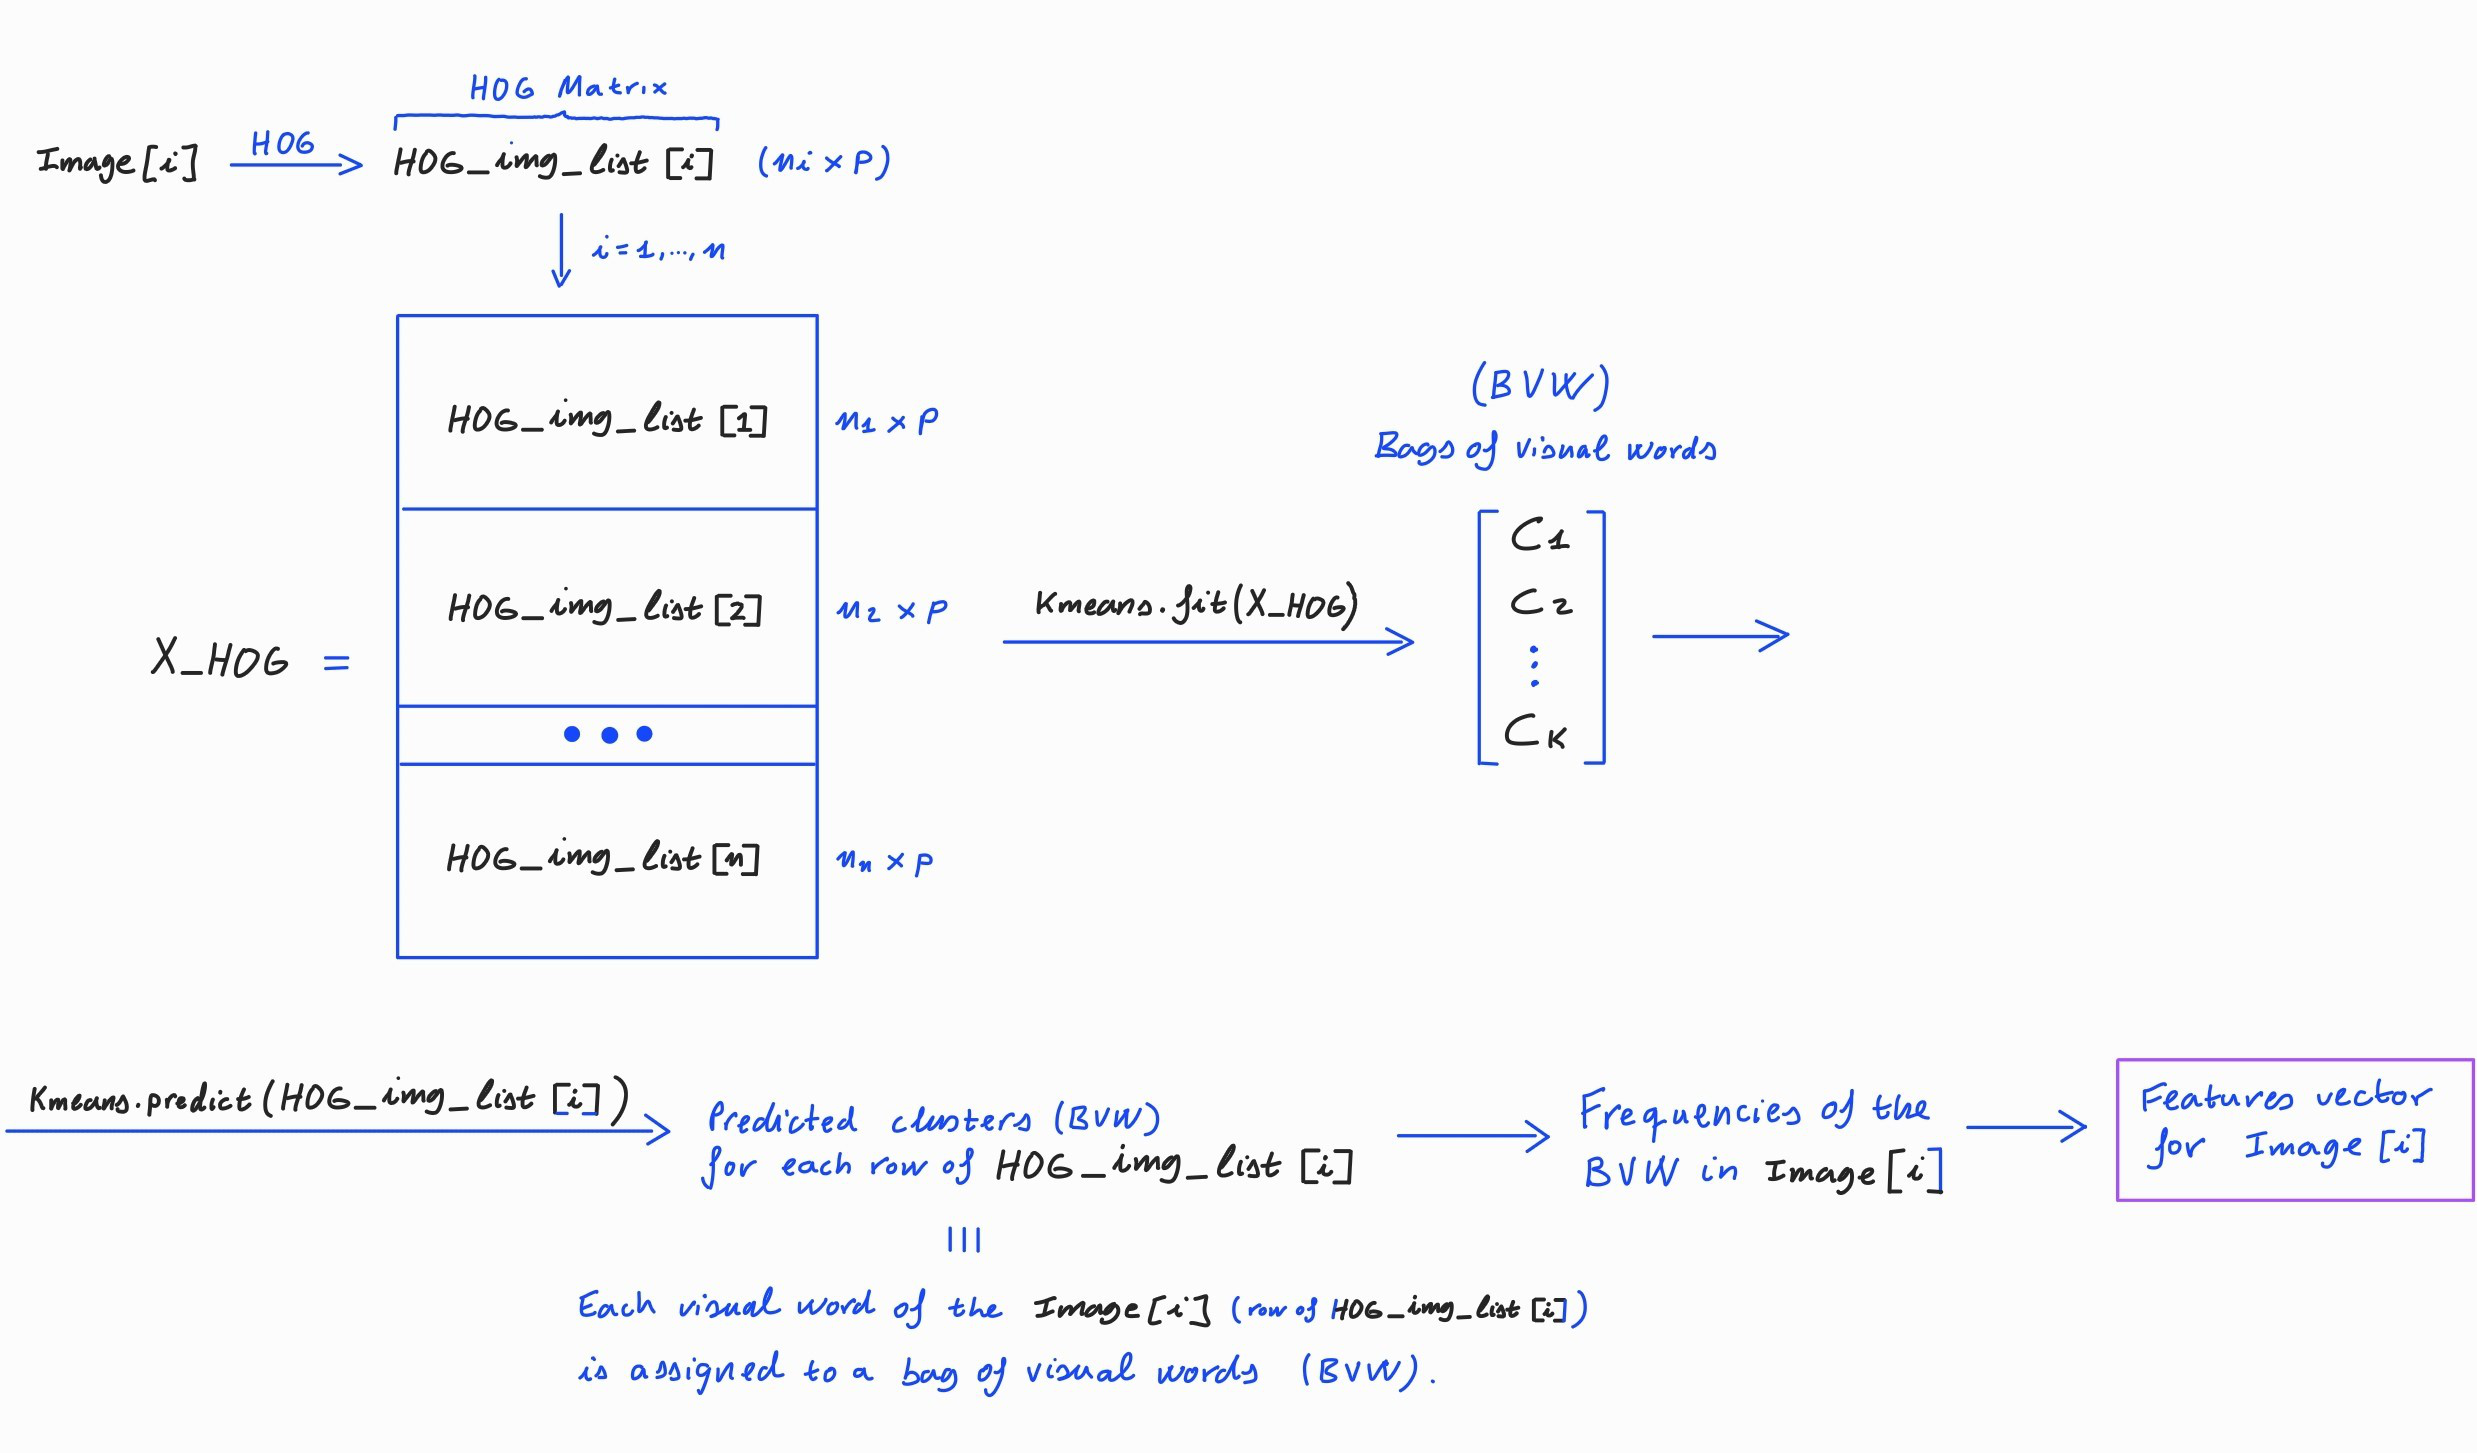

In [72]:
Image.open(r'C:\Users\fscielzo\Documents\DataScience-GitHub\Image Analysis\Image-Classification\Fire-Detection\images\HOG_2.jpg')

## **HOG-stats features matrix**

Given $n$ images $\mathcal{I}_1,\dots , \mathcal{I}_n$ of the same size $h\times w$.

Using the **HOG** method for features extraction **based on statistics**, a **features matrix** for those images can be build as follows: 

$$X =   \begin{pmatrix} v(\mathcal{I}_1)  \\
                        v(\mathcal{I}_2)    \\
                        \dots  \\
                        v(\mathcal{I}_n) 
                        \end{pmatrix} $$

Now $v(\mathcal{I}_i)$  is the a vector of statistics computed by columns on the HOG features matrix $\mathcal{M}(\mathcal{I}_i)$ (`HOG_img`) for the image $\mathcal{I}_i$ $\hspace{0.1cm}\Rightarrow\hspace{0.1cm}$ $v(\mathcal{I}_i)= $ `HOG_img_stats`.

This matrix is a 2D array of size $n\times p$  that contains the HOG statistics of each image.

>Extracting the vector `HOG_img_stats` for each image on the data-set and concatenating them by rows we obtain a HGO-stats features matrix.

### **Getting HGO-stats features matrix**

In this section we are going to use the  class `ImageFeaturesExtraction` from the `PyImageML` package , which has been developed to extract features matrices from data-sets of images, allowing different method for features extraction as well as different functionalities like working with both color and gray images, many filters, different formats and strategies for the different features extraction methods and so on.

In this section `ImageFeaturesExtraction` will be applied with the **HOG** method for feature extraction based on **statistics**, using the data-set of images presented above.

- **Statistics: mean**

In [73]:
img_feature_extraction = ImageFeaturesExtraction(method='HOG', image_height=img_height, image_width=img_width, filter=None, reshape=True,
                                                 orientations=orientations, pixels_per_cell=pixels_per_cell, cells_per_block=cells_per_block, 
                                                 transform_sqrt=True, statistics='mean')

HGO_features_matrix = img_feature_extraction.fit_transform(X=X)

In [74]:
HGO_features_matrix

array([[0.20157584, 0.14783572, 0.12745415, ..., 0.10648443, 0.13134968,
        0.18349608],
       [0.17286368, 0.14136847, 0.15825279, ..., 0.11890768, 0.11860601,
        0.1418163 ],
       [0.18598968, 0.15119294, 0.1556355 , ..., 0.12523065, 0.1435575 ,
        0.16787505],
       ...,
       [0.23156577, 0.10066881, 0.10889268, ..., 0.0777515 , 0.11607629,
        0.11501912],
       [0.25385873, 0.13853749, 0.08665303, ..., 0.09441686, 0.16071724,
        0.22178972],
       [0.19882647, 0.15653812, 0.14570778, ..., 0.12343722, 0.13397905,
        0.15106539]])

In [75]:
HGO_features_matrix.shape

(300, 32)

- **Statistics: mean-Q25-median-Q75-std**

In [76]:
img_feature_extraction = ImageFeaturesExtraction(method='HOG', image_height=img_height, image_width=img_width, filter=None, reshape=True,
                                                 orientations=orientations, pixels_per_cell=pixels_per_cell, cells_per_block=cells_per_block, 
                                                 transform_sqrt=True, statistics='mean-Q25-median-Q75-std')

HGO_features_matrix = img_feature_extraction.fit_transform(X=X)

In [77]:
HGO_features_matrix

array([[0.20157584, 0.14783572, 0.12745415, ..., 0.07722948, 0.08753731,
        0.09752229],
       [0.17286368, 0.14136847, 0.15825279, ..., 0.08342822, 0.08358776,
        0.10379498],
       [0.18598968, 0.15119294, 0.1556355 , ..., 0.07379397, 0.08382094,
        0.09449716],
       ...,
       [0.23156577, 0.10066881, 0.10889268, ..., 0.08503151, 0.10009281,
        0.11873147],
       [0.25385873, 0.13853749, 0.08665303, ..., 0.08438005, 0.10134144,
        0.10840959],
       [0.19882647, 0.15653812, 0.14570778, ..., 0.08484173, 0.0841926 ,
        0.10205706]])

In [78]:
HGO_features_matrix.shape

(300, 160)

- **Applying equalization**

In [79]:
img_feature_extraction = ImageFeaturesExtraction(method='HOG', image_height=img_height, image_width=img_width, filter='equalized', reshape=True, 
                                                 orientations=orientations, pixels_per_cell=pixels_per_cell, cells_per_block=cells_per_block, 
                                                 transform_sqrt=True, statistics='mean')

HGO_features_filtered_matrix = img_feature_extraction.fit_transform(X=X)

In [80]:
HGO_features_filtered_matrix

array([[0.20078454, 0.14787799, 0.12604256, ..., 0.10548965, 0.13279582,
        0.18339162],
       [0.17293476, 0.14033908, 0.1537719 , ..., 0.11915944, 0.11854023,
        0.14170413],
       [0.18746046, 0.15079661, 0.14928058, ..., 0.12890023, 0.14689157,
        0.16894386],
       ...,
       [0.23320771, 0.08942915, 0.1014497 , ..., 0.07468827, 0.11502458,
        0.11756563],
       [0.25469751, 0.13832403, 0.08580414, ..., 0.09091659, 0.16319569,
        0.22209216],
       [0.19423289, 0.15211316, 0.14351524, ..., 0.12170027, 0.12920767,
        0.15031476]])

In [81]:
HGO_features_filtered_matrix.shape

(300, 32)

- **Applying hessian filter**

In [82]:
img_feature_extraction = ImageFeaturesExtraction(method='HOG', image_height=img_height, image_width=img_width, filter='hessian', reshape=True, 
                                                 orientations=orientations, pixels_per_cell=pixels_per_cell, cells_per_block=cells_per_block, 
                                                 transform_sqrt=True, statistics='mean')

HGO_features_filtered_matrix = img_feature_extraction.fit_transform(X=X)

In [83]:
HGO_features_filtered_matrix

array([[0.21395189, 0.15094232, 0.13975573, ..., 0.12033038, 0.13637175,
        0.15742064],
       [0.18118397, 0.14117219, 0.14688905, ..., 0.11819649, 0.12805744,
        0.13398258],
       [0.1952499 , 0.16164455, 0.14418718, ..., 0.12276572, 0.14569308,
        0.15200626],
       ...,
       [0.1919733 , 0.11779311, 0.12347916, ..., 0.10288798, 0.10688693,
        0.16267898],
       [0.24987259, 0.10253705, 0.10691321, ..., 0.12632426, 0.11728681,
        0.20749636],
       [0.20363335, 0.14678954, 0.13949207, ..., 0.11866348, 0.1229296 ,
        0.14670206]])

In [84]:
HGO_features_filtered_matrix.shape

(300, 32)

## **HOG-BVW features matrix**

Given $n$ images $\mathcal{I}_1,\dots , \mathcal{I}_n$ of the same size $h\times w$.

Using the **HOG** method for features extraction **based on BVW**, a **features matrix** for those images can be build as follows: 

$$X =   \begin{pmatrix} v(\mathcal{I}_1)  \\
                        v(\mathcal{I}_2)    \\
                        \dots  \\
                        v(\mathcal{I}_n) 
                        \end{pmatrix} $$

Now $v(\mathcal{I}_i)$ is the a vector of BVW frequencies for the image $\mathcal{I}_i$.

This matrix is a 2D array of size $n\times p$  that contains the BVW frequencies for each image.

>Extracting the vector of BVW frequencies for each image  on the data-set (like it is shown in the diagram) and concatenating them by rows we obtain a HGO-BVW features matrix.

### **Getting HGO-BVW features matrix**

In this section we are going to use the  class `ImageFeaturesExtraction` from the `PyImageML` package , which has been developed to extract features matrices from data-sets of images, allowing different method for features extraction as well as different functionalities like working with both color and gray images, many filters, different formats and strategies for the different features extraction methods and so on.

In this section `ImageFeaturesExtraction` will be applied with the **HOG** method for feature extraction based on **BVW**, using the data-set of images presented above.

In [85]:
img_feature_extraction = ImageFeaturesExtraction(method='HOG', image_height=img_height, image_width=img_width, filter=None, reshape=True, 
                                                 orientations=orientations, pixels_per_cell=pixels_per_cell, cells_per_block=cells_per_block, 
                                                 transform_sqrt=True, statistics='BVW', n_clusters=100)

HGO_features_matrix = img_feature_extraction.fit_transform(X=X)

c:\Users\fscielzo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [86]:
HGO_features_matrix

array([[ 3,  9,  7, ...,  3,  2, 15],
       [ 1,  5, 12, ...,  2,  0, 13],
       [ 5,  8, 20, ...,  0,  4, 40],
       ...,
       [ 3,  5, 13, ...,  1,  4, 14],
       [ 9, 19, 14, ...,  2,  3,  3],
       [10,  5,  7, ...,  6,  0, 10]], dtype=int64)

In [87]:
HGO_features_matrix.shape

(300, 100)

- **Filtering with sobel** 

In [88]:
img_feature_extraction = ImageFeaturesExtraction(method='HOG', image_height=img_height, image_width=img_width, filter='sobel', reshape=True, 
                                                 orientations=orientations, pixels_per_cell=pixels_per_cell, cells_per_block=cells_per_block, 
                                                 transform_sqrt=True, statistics='BVW', n_clusters=100)

HGO_features_filtered_matrix = img_feature_extraction.fit_transform(X=X)

c:\Users\fscielzo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [89]:
HGO_features_filtered_matrix

array([[ 4,  5,  5, ...,  0,  7, 11],
       [ 3,  2, 15, ...,  0,  8,  2],
       [ 0,  2, 12, ...,  0, 10,  0],
       ...,
       [ 3,  8,  1, ..., 11,  6,  0],
       [ 0,  4,  0, ...,  0, 13, 14],
       [ 4,  2,  6, ...,  0,  1,  1]], dtype=int64)

In [90]:
HGO_features_filtered_matrix.shape

(300, 100)

## **HOG - Not Reshaped features matrix**

Given $n$ images $\mathcal{I}_1,\dots , \mathcal{I}_n$ of the same size $h\times w$.

Using the **HOG** method for features extraction **based on not reshaped HOG features**, a **features matrix** for those images can be build as follows: 

$$X =   \begin{pmatrix} v(\mathcal{I}_1)  \\
                        v(\mathcal{I}_2)    \\
                        \dots  \\
                        v(\mathcal{I}_n) 
                        \end{pmatrix} $$

Now $v(\mathcal{I}_i)$ is the a vector of HOG not reshaped features for the image $\mathcal{I}_i$ 

This matrix is a 2D array of size $n\times p$ that contains the not reshaped HOG features for each image.

>Extracting the not reshape HGO features for each image on the data-set and concatenating them by rows we obtain a HGO - not reshaped features matrix.

- The **problem** of this approach is that leads to a **dimensionality problem** on $p$, so it needs to be applied along with **dimensionality reduction** techniques such as PCA.

### **Getting HGO - Not Reshaped features matrix**

In this section we are going to use the  class `ImageFeaturesExtraction` from the `PyImageML` package , which has been developed to extract features matrices from data-sets of images, allowing different method for features extraction as well as different functionalities like working with both color and gray images, many filters, different formats and strategies for the different features extraction methods and so on.

In this section `ImageFeaturesExtraction` will be applied with the **HOG** method for feature extraction based on **not reshaping**, using the data-set of images presented above.

In [91]:
img_feature_extraction = ImageFeaturesExtraction(method='HOG', image_height=img_height, image_width=img_width, filter=None, reshape=False,
                                                 orientations=orientations, pixels_per_cell=pixels_per_cell, cells_per_block=cells_per_block, 
                                                 transform_sqrt=True)

HGO_features_matrix = img_feature_extraction.fit_transform(X=X)

In [92]:
HGO_features_matrix

array([[0.23803907, 0.04517031, 0.11159217, ..., 0.13129353, 0.08770483,
        0.09647536],
       [0.24584797, 0.02077305, 0.0480539 , ..., 0.22148548, 0.13344476,
        0.09433893],
       [0.23915977, 0.23915977, 0.14695772, ..., 0.23245254, 0.23245254,
        0.11289806],
       ...,
       [0.45553614, 0.        , 0.        , ..., 0.        , 0.12639003,
        0.        ],
       [0.26050084, 0.28689935, 0.28689935, ..., 0.12227303, 0.11154988,
        0.27509187],
       [0.05024678, 0.00761688, 0.13056183, ..., 0.0925665 , 0.11715885,
        0.21169244]])

In [93]:
HGO_features_matrix.shape

(300, 20416)

- **Filtering with sobel**

In [94]:
img_feature_extraction = ImageFeaturesExtraction(method='HOG', image_height=img_height, image_width=img_width, filter='sobel', reshape=False,
                                                 orientations=orientations, pixels_per_cell=pixels_per_cell, cells_per_block=cells_per_block, 
                                                 transform_sqrt=True)

HGO_features_matrix = img_feature_extraction.fit_transform(X=X)

In [95]:
HGO_features_matrix

array([[0.16068715, 0.02210637, 0.08932776, ..., 0.21273152, 0.08234161,
        0.12393073],
       [0.22659834, 0.12988755, 0.04618949, ..., 0.24691583, 0.12855758,
        0.11606701],
       [0.22888939, 0.11324927, 0.22888939, ..., 0.2248361 , 0.2248361 ,
        0.17443813],
       ...,
       [0.41634108, 0.        , 0.        , ..., 0.        , 0.07710316,
        0.06034293],
       [0.29468638, 0.09417174, 0.02467003, ..., 0.21154874, 0.09705226,
        0.24505233],
       [0.07725128, 0.04226268, 0.05836576, ..., 0.11682897, 0.22934459,
        0.13684988]])

In [96]:
HGO_features_matrix.shape

(300, 20416)

## **Convolutional Neural Networks Method**

Using Convolutional Neural Networks (CNNs) for extracting image features offers several advantages:

- **Hierarchical Feature Learning:** CNNs are designed to automatically learn hierarchical representations of features from raw input data. In the case of images, lower layers typically learn simple features like edges and textures, while higher layers learn more complex features like object parts and whole objects. By using a pre-trained CNN, you leverage the knowledge encoded in these learned features without having to manually engineer them.

- **Transfer Learning:** Pre-trained CNN models, such as VGG, ResNet, or Inception, have been trained on large-scale datasets like ImageNet for image classification tasks. These models have learned to recognize a wide variety of visual patterns and concepts. By using these pre-trained models as feature extractors, you can transfer this learned knowledge to new tasks or datasets with relatively little data. This is particularly useful when you have a small dataset or limited computational resources for training your own models from scratch.

- **Dimensionality Reduction:** The features extracted by CNNs typically reside in high-dimensional spaces, capturing rich information about the input images. These features can be used to represent images in a more compact and meaningful way compared to raw pixel values. This can be particularly beneficial for tasks such as image retrieval, where you want to efficiently compare images based on their visual content.

- **Robustness to Variations:** CNNs are designed to be robust to various transformations and distortions in the input images, such as changes in scale, rotation, illumination, and partial occlusion. The features learned by CNNs tend to capture invariant properties of objects, making them effective for tasks like object recognition and detection under different conditions.

- **Interpretable Representations:** The features learned by CNNs often correspond to semantically meaningful concepts in the images, such as object shapes, textures, or parts. This makes the extracted features more interpretable compared to handcrafted features, allowing for better understanding of the underlying characteristics of the data.

In [ ]:
# Load CNN model
model = VGG16()
# Remove the output layer
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
# Extracting the image height and width expected for the used CNN model.
img_height_CNN = model.inputs[0].shape[1]
img_width_CNN = model.inputs[0].shape[2]

# Load an image from file
img_path = X[103]
x = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_width_CNN, img_height_CNN))
# Convert the image pixels to a numpy array
x = tf.keras.preprocessing.image.img_to_array(x)
# Reshape data for the model
x = np.expand_dims(x, axis=0)
# Prepare the image for the VGG model
x = preprocess_input(x)
# Get CNN features
CNN_features = model.predict(x)

In [98]:
CNN_features

array([[0.7327867, 0.       , 6.7262554, ..., 2.1139264, 5.3945417,
        0.       ]], dtype=float32)

In [99]:
CNN_features.shape

(1, 4096)

## **CNN features matrix**

Given $n$ images $\mathcal{I}_1,\dots , \mathcal{I}_n$ of the same size $h\times w$.

Using the **CNN** method for features extraction, a **features matrix** for those images can be build as follows: 

$$X =   \begin{pmatrix} v(\mathcal{I}_1)  \\
                        v(\mathcal{I}_2)    \\
                        \dots  \\
                        v(\mathcal{I}_n) 
                        \end{pmatrix} $$

Now $v(\mathcal{I}_i)$ is a vector with the CNN features for the image $\mathcal{I}_i$ $\hspace{0.1cm}\Rightarrow\hspace{0.1cm}$ $v(\mathcal{I}_i)= $ `CNN_features`.

This matrix is a 2D array of size $n\times p$  that contains the CNN features of each image.

>Extracting the vector `CNN_features` for each image  on the data-set and concatenating them by rows we obtain a CNN features matrix.

### **Getting CNN features matrix**

In this section we are going to use the  class `ImageFeaturesExtraction` from the `PyImageML` package , which has been developed to extract features matrices from data-sets of images, allowing different method for features extraction as well as different functionalities like working with both color and gray images, many filters, different formats and strategies for the different features extraction methods and so on.

In this section `ImageFeaturesExtraction` will be applied with the **CNN** method for feature extraction, using the data-set of images presented above.

In [ ]:
img_feature_extraction = ImageFeaturesExtraction(method='CNN')

CNN_features_matrix = img_feature_extraction.fit_transform(X=X)

In [101]:
CNN_features_matrix

array([[0.39077538, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 2.8053548 , 1.1582053 , ..., 0.        , 3.9529238 ,
        0.13838303],
       [0.        , 1.5708483 , 0.9057204 , ..., 0.        , 1.3198075 ,
        0.67053926],
       ...,
       [0.31342962, 0.04839906, 2.9200916 , ..., 2.756431  , 0.48978698,
        0.223643  ],
       [0.        , 0.        , 3.3499594 , ..., 0.        , 2.0666275 ,
        0.        ],
       [0.        , 0.8232522 , 0.51099145, ..., 5.909257  , 5.0205564 ,
        0.        ]], dtype=float32)

In [102]:
CNN_features_matrix.shape

(300, 4096)